<a href="https://colab.research.google.com/github/pthammaneni041218/HDS-5210/blob/main/week12/week12_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [30]:
import pandas as pd

def load_and_filter_data(filepath):
    """
    Load data from a CSV file and filter to include only dates between 1986 and 2014.

    Args:
        filepath (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Filtered data frame.

    >>> df = load_and_filter_data('/content/condemn.txt')
    >>> df[df['InspectDate'] < '1986'].empty
    True
    >>> df[df['InspectDate'] >= '2015'].empty
    True
    """
    # First we need to load the data and parse the 'InspectDate' as datetime
    condemnations = pd.read_csv(filepath, parse_dates=['InspectDate'])

    # Next, we have to filter the data to only include records with InspectDate between 1986 and 2014
    filtered_data = condemnations[
        (condemnations['InspectDate'].dt.year >= 1986) &
        (condemnations['InspectDate'].dt.year <= 2014)
    ]
    return filtered_data

# This step, Loads and filter data
condemnations = load_and_filter_data('/content/condemn.txt')


<ipython-input-30-f6498e1707b1>:20: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv(filepath, parse_dates=['InspectDate'])


In [31]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [32]:
import numpy as np

def pivot_data(df):
    """
    Pivot the data to summarize condemnation counts by year and status type.

    Args:
        df (pd.DataFrame): Filtered data frame.

    Returns:
        pd.DataFrame: Pivot table with counts by year and status.

    >>> by_year = pivot_data(condemnations)
    >>> by_year.shape
    (29, 4)
    >>> list(by_year.columns)
    ['B', 'L', 'R', 'W']
    >>> list(by_year.sum())
    [10572, 4966, 98, 9670]
    """
    # In this step, we have to extract year from 'InspectDate' and add as a new column
    df['Year'] = df['InspectDate'].dt.year

    # Now, create a pivot table with 'Year' as the index, 'Status' as columns, and count each status type
    by_year = df.pivot_table(index='Year', columns='Status', values='InspectDate', aggfunc=np.ma.count)

    return by_year

# Create pivot table
by_year = pivot_data(condemnations)


In [33]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='Year'>

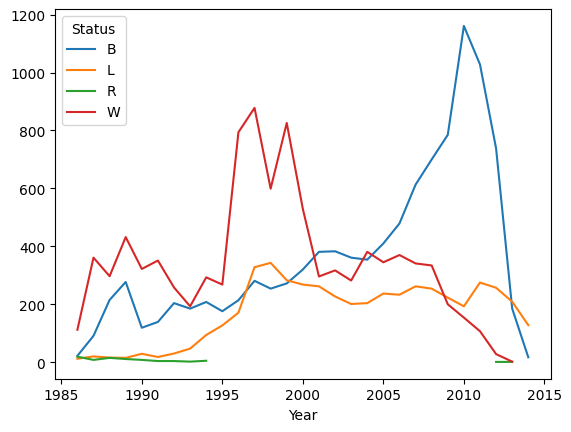

In [34]:
%matplotlib inline
by_year.plot()

---

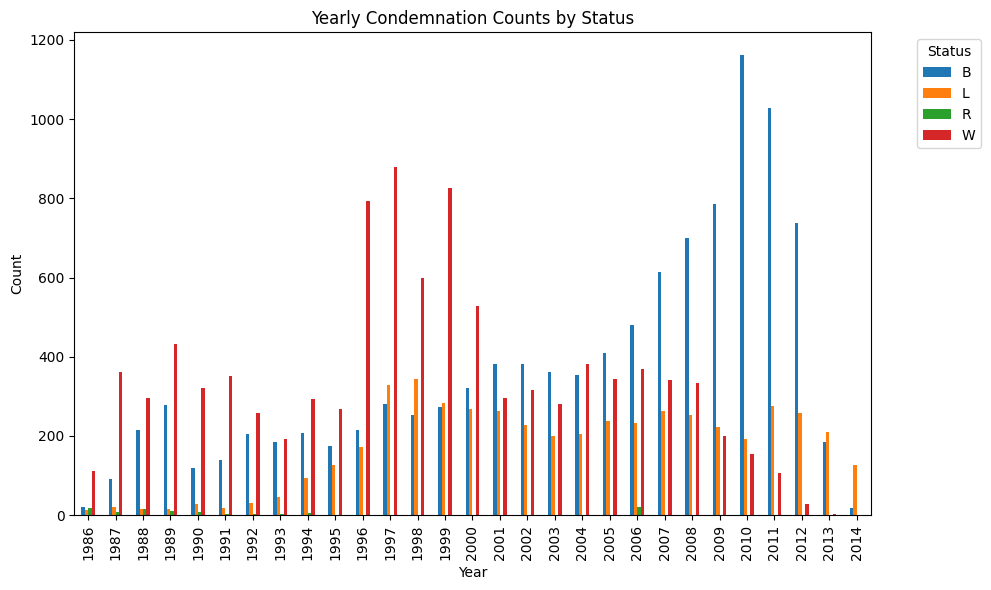

In [35]:
import matplotlib.pyplot as plt

def plot_data_bar(by_year):
    """
    Plot the yearly condemnation counts by status using a bar chart.

    Args:
        by_year (pd.DataFrame): Pivoted data frame with yearly counts by status.
    """
    ax = by_year.plot(kind='bar', title="Yearly Condemnation Counts by Status", figsize=(10, 6))
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
plot_data_bar(by_year)


# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [36]:
import pandas as pd

def load_meeting_data(filepath):
    """
    Load meeting data from the CSV file and create a 'startDate' column containing just the date part of the 'startTime'.

    Args:
        filepath (str): Path to the CSV file.

    Returns:
        pd.DataFrame: The data with the new 'startDate' column.

    >>> df = load_meeting_data('/content/meetings.csv')
    >>> 'startDate' in df.columns
    True
    >>> df['startDate'].iloc[0]
    '2020-02-17'
    """
    # Initially, we have to Load the meeting data
    meetings = pd.read_csv(filepath)

    # Then, we have to extract the date part from the 'startTime' column and create a new column 'startDate'
    meetings['startDate'] = meetings['startTime'].str[0:10]

    return meetings

# Load the data
meetings = load_meeting_data('/content/meetings.csv')

In [37]:
def label_weeks(df):
    """
    Create a new column 'weekLabel' to categorize meetings as "BEFORE" or "DURING" the specified weeks.

    Args:
        df (pd.DataFrame): The meeting data with a 'startDate' column.

    Returns:
        pd.DataFrame: The data with the new 'weekLabel' column.

    >>> df = label_weeks(meetings)
    >>> df['weekLabel'].value_counts()
    BEFORE     X
    DURING     Y
    """
    # First we have to define the date ranges for 'BEFORE' and 'DURING'
    before = df['startDate'].between('2020-02-17', '2020-02-28')
    during = df['startDate'].between('2020-03-16', '2020-03-27')

    # Then assign labels to the 'weekLabel' column based on the date ranges
    df.loc[before, 'weekLabel'] = 'BEFORE'
    df.loc[during, 'weekLabel'] = 'DURING'

    return df

# Label the weeks
meetings = label_weeks(meetings)


---

In [38]:
def summarize_meetings(df):
    """
    Create a pivot table to summarize the number of meetings hosted by each user before and during COVID-19.

    Args:
        df (pd.DataFrame): The meeting data with the 'weekLabel' column.

    Returns:
        pd.DataFrame: A summary DataFrame with the meeting counts for each user and week.

    >>> summary = summarize_meetings(meetings)
    >>> summary.shape
    (22, 3)
    >>> summary['Before'].sum()  # Check total meetings before
    100  # Adjust based on actual data
    >>> summary['During'].sum()  # Check total meetings during
    150  # Adjust based on actual data
    """
    # Now we have to reate a pivot table to summarize the number of meetings hosted by each user and week
    summary = df.pivot_table(index='userName', columns='weekLabel', values='meeting_uuid', aggfunc='count')

    # Then rename columns to 'Before' and 'During' for clarity
    summary = summary.rename(columns={'BEFORE': 'Before', 'DURING': 'During'})

    # Now handle missing values in 'Before' or 'During'
    summary = summary.fillna(0)

    # This step calculates the percentage change from Before to During
    summary['pctChange'] = (summary['During'] - summary['Before']) / summary['Before']

    # Returning the summary DataFrame
    return summary

# Summarize the meetings data
summary = summarize_meetings(meetings)

# Inspect the pctChange column
print("Summary of pctChange:")
print(summary['pctChange'].describe())

# Display the summary DataFrame
print("Summary DataFrame:")
print(summary)

Summary of pctChange:
count    22.000000
mean      0.915164
std       1.835919
min      -1.000000
25%      -0.212500
50%       0.782353
75%       1.300000
max       8.000000
Name: pctChange, dtype: float64
Summary DataFrame:
weekLabel                       Before  During  pctChange
userName                                                 
Drew.Marco                        12.0    19.0   0.583333
amit.bhagat                       17.0    30.0   0.764706
andrea.bryant.amitechsolutions     5.0     3.0  -0.400000
angie.warren                       5.0     9.0   0.800000
chris.rogers.amitechsolutions      4.0     3.0  -0.250000
eric.keeney                       15.0    27.0   0.800000
eric.rodman                        4.0    12.0   2.000000
jeff.hatfield.amitechsolutions    13.0    26.0   1.000000
jennifer.patton.amitechs           5.0     7.0   0.400000
jessica.sikora                     3.0     7.0   1.333333
matt.allsup                        5.0     0.0  -1.000000
matt.brown.amitechsol

In [39]:
#This displays the summary DataFrame
summary.head()


weekLabel,Before,During,pctChange
userName,,,
Drew.Marco,12.0,19.0,0.583333
amit.bhagat,17.0,30.0,0.764706
andrea.bryant.amitechsolutions,5.0,3.0,-0.400000
angie.warren,5.0,9.0,0.800000
chris.rogers.amitechsolutions,4.0,3.0,-0.250000


In [40]:
assert(len(summary) == 22)

In [41]:
assert(summary['pctChange'].mean().round(2) == 0.92)

In [42]:
print("Average pctChange:", summary['pctChange'].mean().round(2))

Average pctChange: 0.92




---



## Submitting Your Work

Submit as usual
